In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [12]:
# Load the dataset
data = pd.read_csv('HousingData.csv')

In [13]:
#explore the dataset
print(data.head())

#summary statistics
print(data.describe())

#check for null values
print(data.isnull().sum())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.720192   23.388876    6.835896    0.255340    0.115878    0.702617   
min      0.006320    0.000000    0.460000    

In [14]:
# Fill missing values in all columns with the mean of their respective columns
data.fillna(data.mean(), inplace=True)

# Verify that there are no more missing values
print(data.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [6]:
# Define the features and the target variable
X = data.drop('MEDV', axis=1)
y = data['MEDV']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 25.017672023842596
R-squared: 0.6588520195508154


In [17]:
# Example: Predict the house prices for the first five rows of the testing set
print(y_pred[:5])
print(y_test[:5].values)

[29.14324958 36.53566752 14.49251294 25.08111038 18.45609233]
[23.6 32.4 13.6 22.8 16.1]


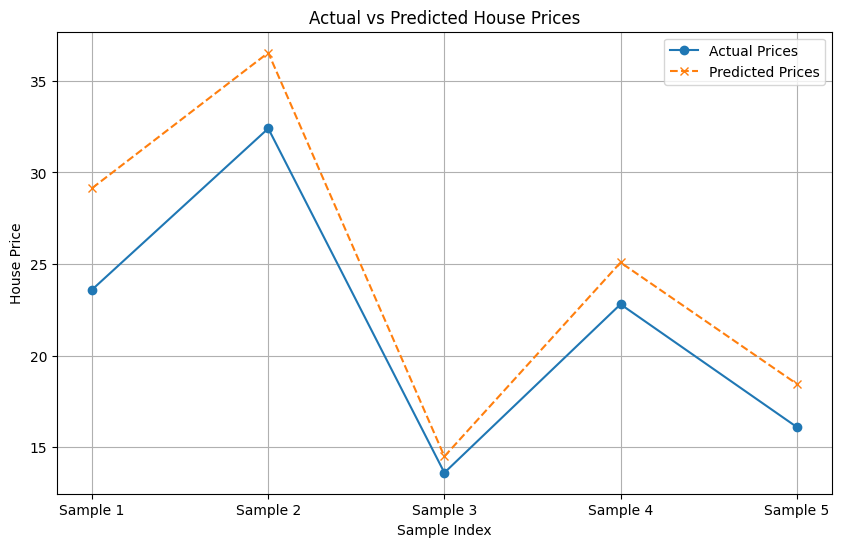

In [18]:
# Predict the house prices for the first five rows of the testing set
y_pred_first_five = y_pred[:5]
y_test_first_five = y_test[:5].values

# Visualization
plt.figure(figsize=(10, 6))

# Plot actual vs predicted values
plt.plot(range(5), y_test_first_five, marker='o', label='Actual Prices')
plt.plot(range(5), y_pred_first_five, marker='x', linestyle='--', label='Predicted Prices')

# Add title and labels
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Sample Index')
plt.ylabel('House Price')
plt.xticks(range(5), ['Sample 1', 'Sample 2', 'Sample 3', 'Sample 4', 'Sample 5'])
plt.legend()
plt.grid(True)

# Show the plot
plt.show()